<a href="https://colab.research.google.com/github/Anmol012001/Iot-Botnet-Classification-and-Detection/blob/main/BotnetDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adding Dataset from Kaggle**

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"prathamkashyap","key":"fcfe3b790fb8f98a98e5456eb126014b"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download mkashifn/nbaiot-dataset

100% 1.75G/1.75G [00:26<00:00, 58.2MB/s]
100% 1.75G/1.75G [00:26<00:00, 72.2MB/s]


In [ ]:
! unzip nbaiot-dataset.zip

Archive:  nbaiot-dataset.zip
  inflating: 1.benign.csv            
  inflating: 1.gafgyt.combo.csv      
  inflating: 1.gafgyt.junk.csv       
  inflating: 1.gafgyt.scan.csv       
  inflating: 1.gafgyt.tcp.csv        
  inflating: 1.gafgyt.udp.csv        
  inflating: 1.mirai.ack.csv         
  inflating: 1.mirai.scan.csv        
  inflating: 1.mirai.syn.csv         
  inflating: 1.mirai.udp.csv         
  inflating: 1.mirai.udpplain.csv    
  inflating: 2.benign.csv            
  inflating: 2.gafgyt.combo.csv      
  inflating: 2.gafgyt.junk.csv       
  inflating: 2.gafgyt.scan.csv       
  inflating: 2.gafgyt.tcp.csv        
  inflating: 2.gafgyt.udp.csv        
  inflating: 2.mirai.ack.csv         
  inflating: 2.mirai.scan.csv        
  inflating: 2.mirai.syn.csv         
  inflating: 2.mirai.udp.csv         
  inflating: 2.mirai.udpplain.csv    
  inflating: 3.benign.csv            
  inflating: 3.gafgyt.combo.csv      
  inflating: 3.gafgyt.junk.csv       
  inflating: 3.gafgyt

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

**Reading Dataset**

In [ ]:
benign_df = pd.read_csv('6.benign.csv')
g_c_df = pd.read_csv('6.gafgyt.combo.csv')
g_j_df = pd.read_csv('6.gafgyt.junk.csv')
g_s_df = pd.read_csv('6.gafgyt.scan.csv')
g_t_df = pd.read_csv('6.gafgyt.tcp.csv')
g_u_df = pd.read_csv('6.gafgyt.udp.csv')
m_a_df = pd.read_csv('6.mirai.ack.csv')
m_sc_df = pd.read_csv('6.mirai.scan.csv')
m_sy_df = pd.read_csv('6.mirai.syn.csv')
m_u_df = pd.read_csv('6.mirai.udp.csv')
m_u_p_df = pd.read_csv('6.mirai.udpplain.csv')

# New Section

In [ ]:
benign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98514 entries, 0 to 98513
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 86.4 MB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
malicious = pd.concat([m_u_df, g_c_df, g_j_df,
                g_s_df, g_t_df, g_u_df, m_a_df, m_sc_df,
                m_sy_df, m_u_p_df], ignore_index=True)
malicious.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738377 entries, 0 to 738376
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 647.8 MB


In [ ]:
mirai = pd.concat([m_u_df, m_a_df, m_sc_df,
                m_sy_df, m_u_p_df], ignore_index=True)
mirai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429337 entries, 0 to 429336
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 376.7 MB


In [ ]:
bashlite = pd.concat([g_c_df, g_j_df,
                g_s_df, g_t_df, g_u_df], ignore_index=True)
bashlite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309040 entries, 0 to 309039
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 271.1 MB


**Assigning Labels to Dataset**

In [ ]:
benign_df['type'] = 0
g_c_df['type'] = 1
g_j_df['type'] = 1
g_s_df['type'] = 1
g_t_df['type'] = 1
g_u_df['type'] = 1
m_a_df['type'] = 2
m_sc_df['type'] = 2
m_sy_df['type'] = 2
m_u_df['type'] = 2
m_u_p_df['type'] = 2

**Conactenating into One Dataset**

In [ ]:
df = pd.concat([benign_df, m_u_df, g_c_df, g_j_df,
                g_s_df, g_t_df, g_u_df, m_a_df, m_sc_df,
                m_sy_df, m_u_p_df], ignore_index=True)

In [ ]:
df["type"].value_counts()

2    429337
1    309040
0     98514
Name: type, dtype: int64

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
display(df)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,0
1,1.000000,590.000000,0.000000e+00,1.000000,590.000000,0.000000,1.000000,590.000000,0.000000,1.000000,...,0.0,0.0,4.456899,443.197258,121.885335,443.197258,1.485603e+04,0.0,0.0,0
2,1.956973,590.000000,5.820000e-11,1.973957,590.000000,0.000000,1.991242,590.000000,0.000000,1.999121,...,0.0,0.0,5.456507,470.101420,123.932152,470.101420,1.535918e+04,0.0,0.0,0
3,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,0
4,1.988608,66.034372,3.599882e+01,1.993149,66.020623,35.999575,1.997711,66.006874,35.999953,1.999771,...,0.0,0.0,1.000000,72.000000,0.000000,72.000000,0.000000e+00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836886,175.922167,245.258296,5.719696e+04,245.165360,280.596349,60311.720364,518.098108,308.772943,61001.231629,3432.954056,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,2
836887,176.921585,244.211175,5.706656e+04,246.164874,279.700216,60263.595485,519.097765,308.293702,61002.710201,3433.953829,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,2
836888,176.517481,245.966179,5.728387e+04,245.990822,280.815298,60323.235552,519.271193,308.766877,61001.270900,3434.406639,...,0.0,0.0,13201.854171,554.000000,0.000048,554.000000,2.328306e-09,0.0,0.0,2
836889,177.516314,247.701421,5.749268e+04,246.989846,281.921354,60379.936216,520.270506,309.238234,60999.391919,3435.406185,...,0.0,0.0,13202.853996,554.000000,0.000049,554.000000,2.444722e-09,0.0,0.0,2


<Axes: title={'center': 'Class Distribution'}>

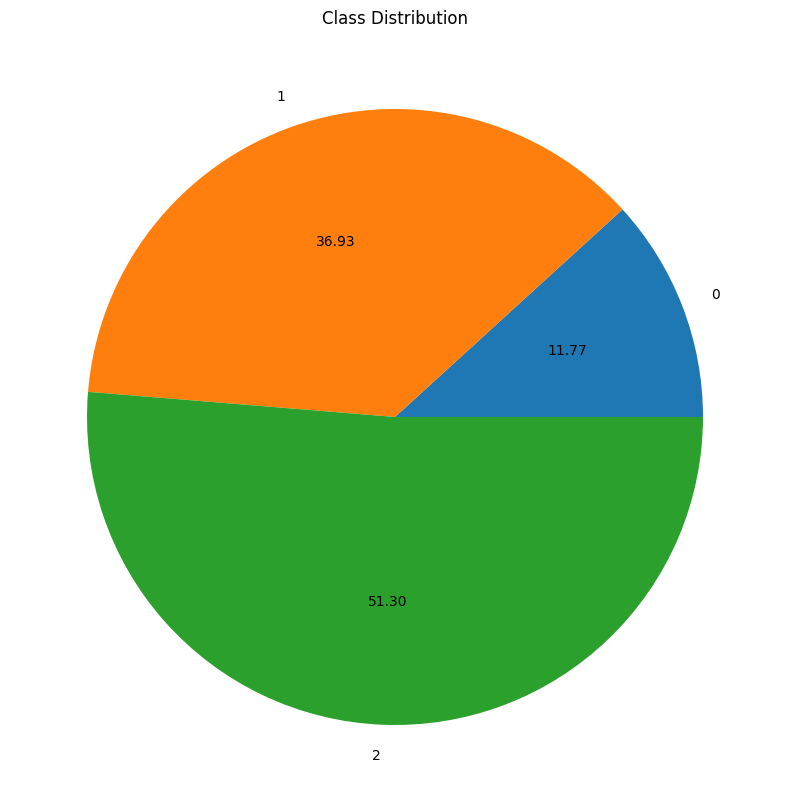

In [ ]:
plt.title("Class Distribution")
df.groupby("type").size().plot(kind='pie', autopct='%.2f', figsize=(10,10))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836891 entries, 0 to 836890
Columns: 116 entries, MI_dir_L5_weight to type
dtypes: float64(115), int64(1)
memory usage: 740.7 MB


**Splitting Dataset and Feature Selection**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import learning_curve

In [ ]:
X = df.drop('type', axis=1)
y = df['type']

In [ ]:
selector = SelectKBest(f_classif, k=10) # Select the top 10 features
X_selected = selector.fit_transform(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Get the list of selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the list of selected feature names
selected_features = [X.columns[i] for i in selected_indices]

print("Selected features:", selected_features)

Selected features: ['MI_dir_L1_mean', 'MI_dir_L0.1_mean', 'MI_dir_L0.01_weight', 'MI_dir_L0.01_mean', 'MI_dir_L0.01_variance', 'H_L1_mean', 'H_L0.1_mean', 'H_L0.01_weight', 'H_L0.01_mean', 'H_L0.01_variance']


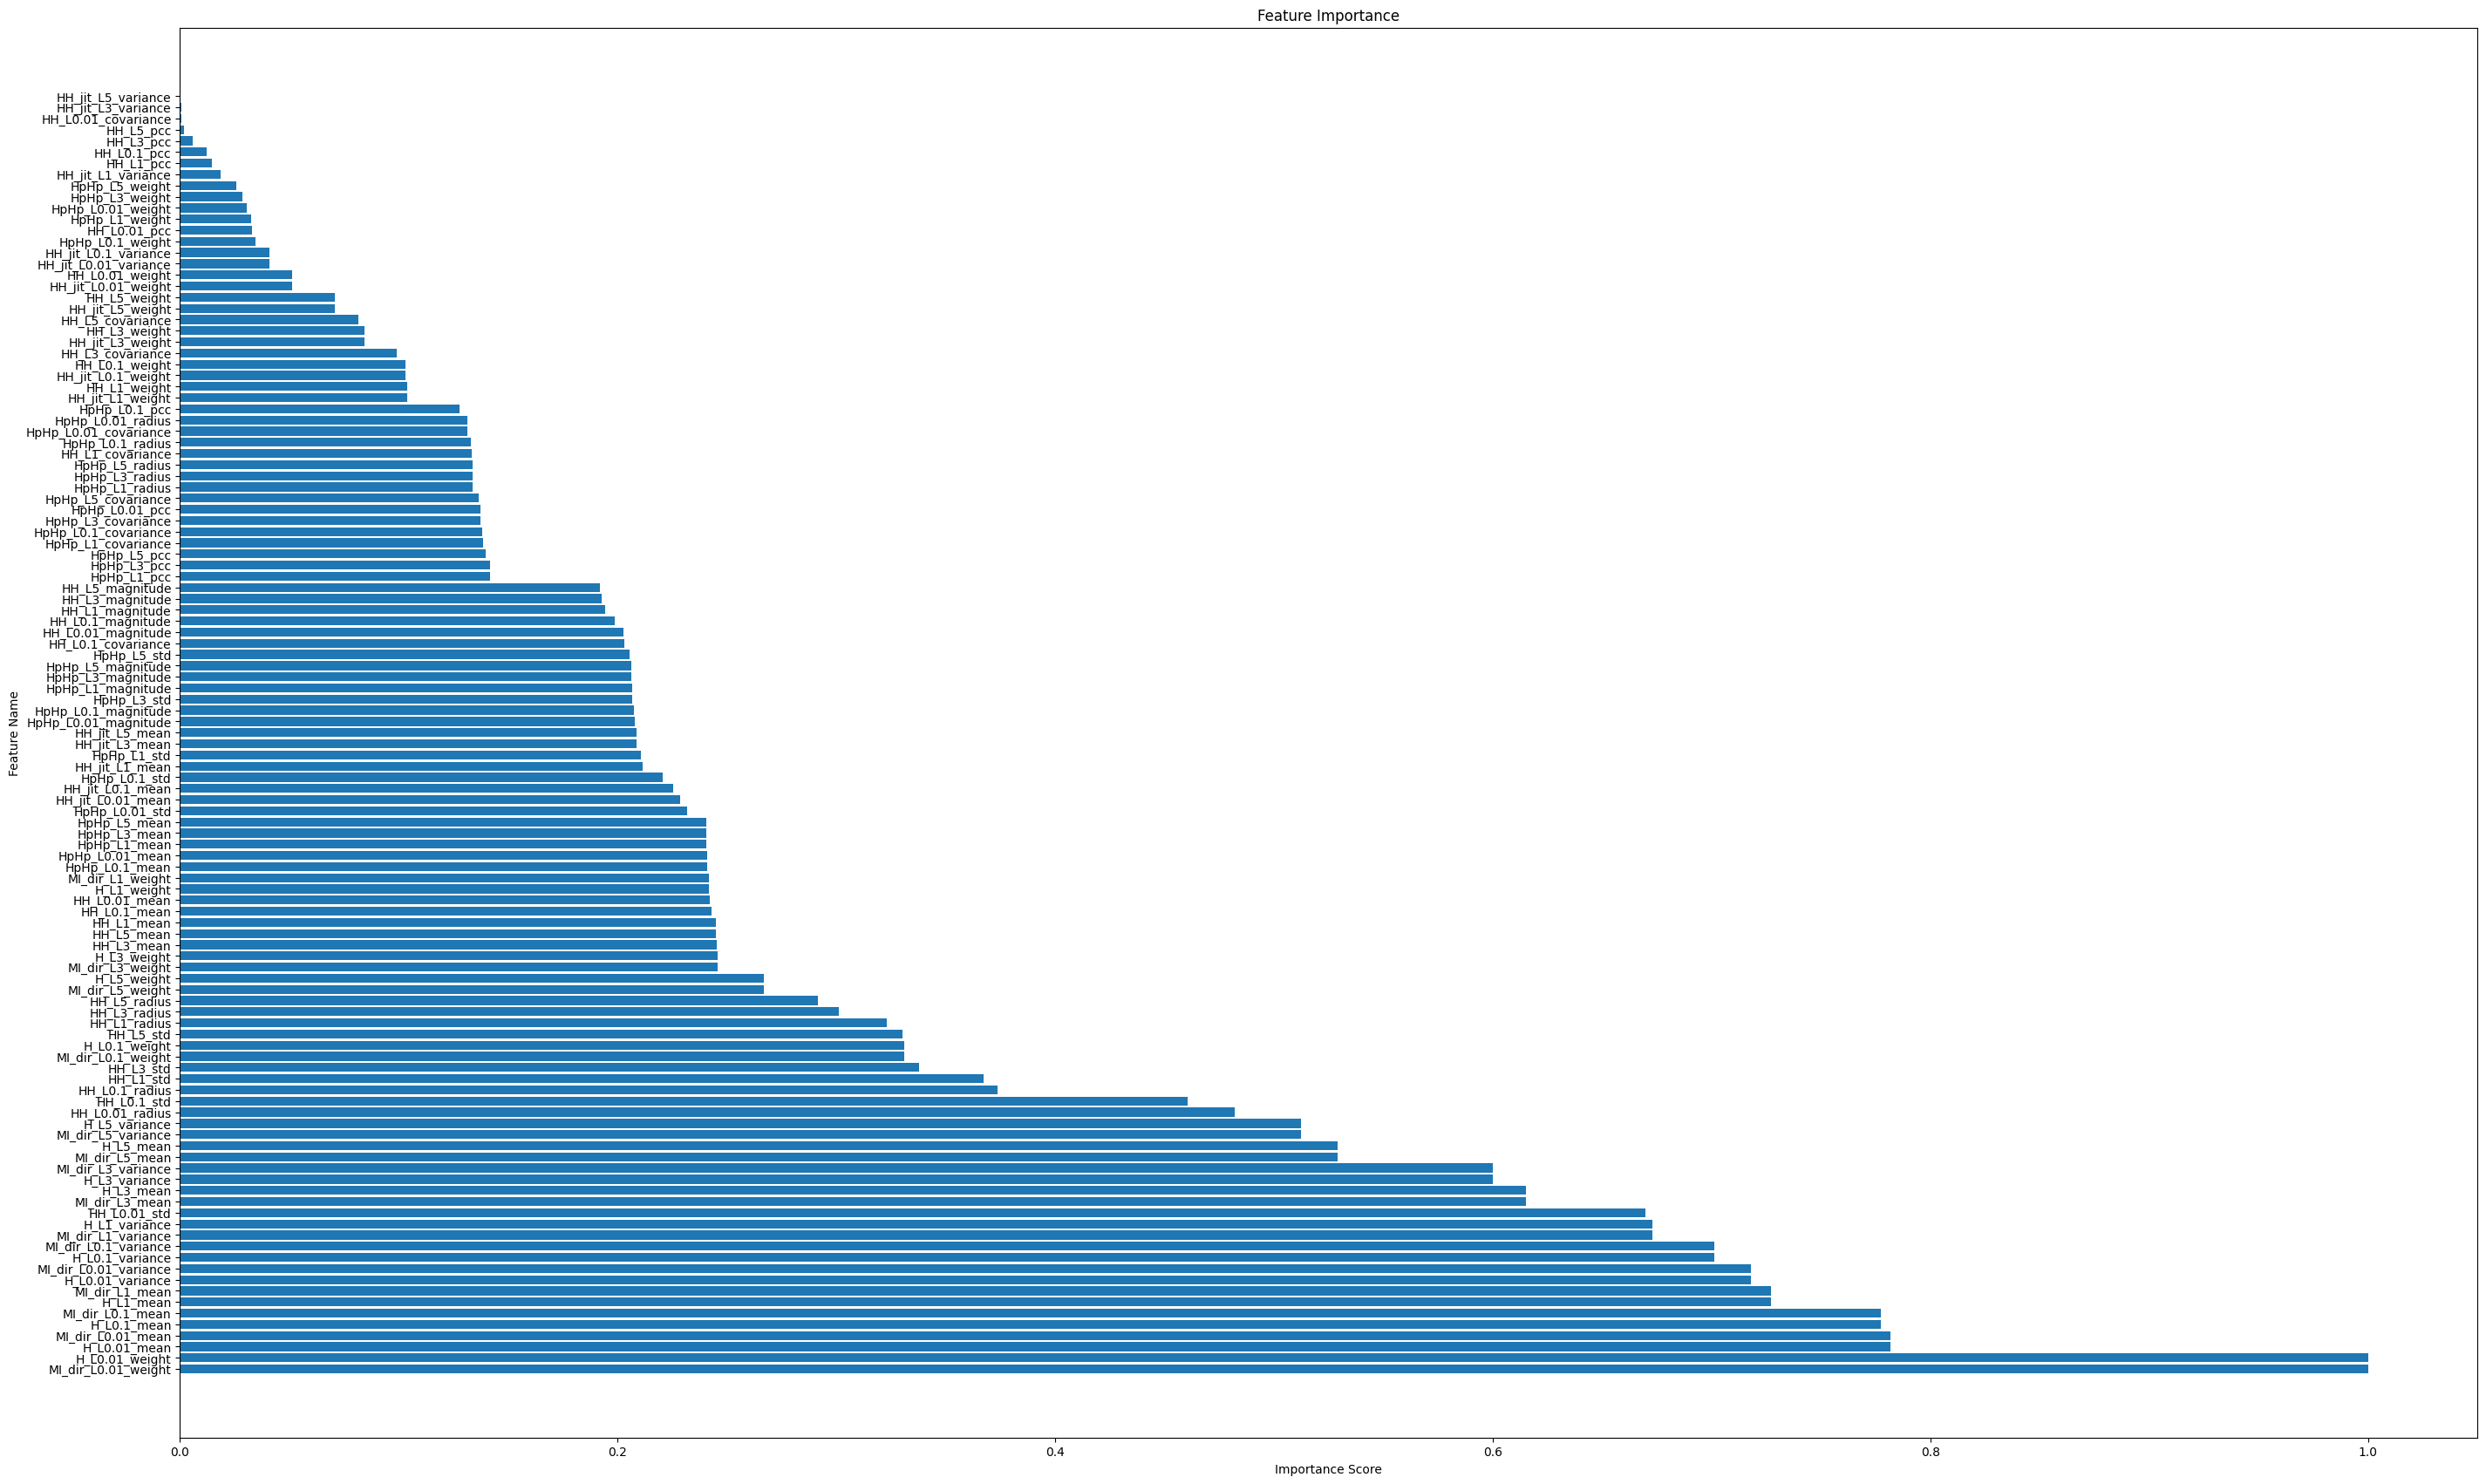

In [ ]:
# Get the feature importance scores
scores = selector.scores_
scores /= scores.max()

# Sort the features by importance score
sorted_indices = np.argsort(scores)[::-1]
sorted_features = [X.columns[i] for i in sorted_indices]

# Create a horizontal bar plot of feature importance scores
fig, ax = plt.subplots(figsize=(34, 21))
ax.barh(sorted_features, scores[sorted_indices])
ax.set_title("Feature Importance")
ax.set_xlabel("Importance Score")
ax.set_ylabel("Feature Name")
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

*Evaluation*

Accuracy, Precision, Recall, F1

In [ ]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

# Print the performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.9999283062755907
Precision: 0.9999283083771873
Recall: 0.9999283062755907
F1 score: 0.9999283071602983


Classification Report

In [ ]:
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29455
           1       1.00      1.00      1.00     92753
           2       1.00      1.00      1.00    128860

    accuracy                           1.00    251068
   macro avg       1.00      1.00      1.00    251068
weighted avg       1.00      1.00      1.00    251068



Confusion Matrix

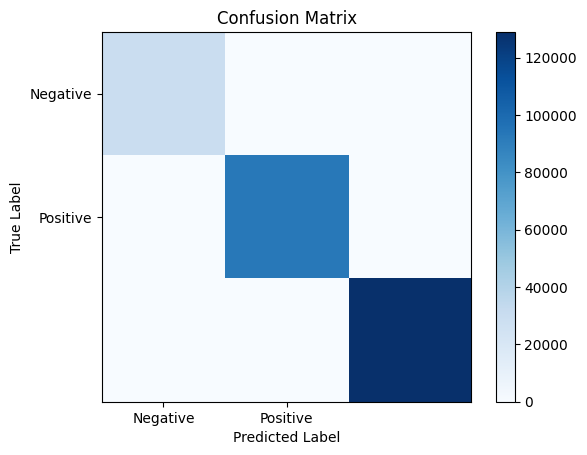

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.colorbar()

# Show the plot
plt.show()

ROC Curve

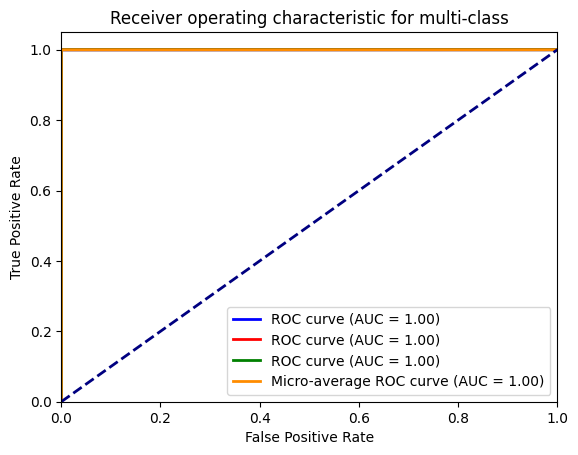

In [ ]:
# Compute the ROC curve and AUC

# Convert the labels to binary form
y_test_binary = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binary.shape[1]

# Compute the probabilities for each class
probas = model.predict_proba(X_test)

# Compute the ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), probas.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class and micro-average
plt.figure()
lw = 2
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc[i])

plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='Micro-average ROC curve (AUC = %0.2f)' % roc_auc["micro"])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

Precision Recall Curve

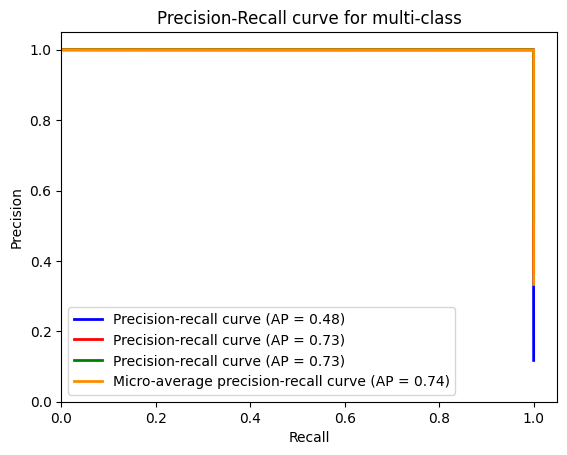

In [ ]:
# Convert the labels to binary form
y_test_binary = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binary.shape[1]

# Compute the probabilities for each class
probas = model.predict_proba(X_test)

# Compute the precision-recall curve and average precision for each class
precision = {}
recall = {}
average_precision = {}
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binary[:, i], probas[:, i])
    average_precision[i] = np.average(precision[i], weights=recall[i])

# Compute micro-average precision-recall curve and average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_binary.ravel(), probas.ravel())
average_precision["micro"] = np.average(precision["micro"], weights=recall["micro"])

# Plot precision-recall curve for each class and micro-average
plt.figure()
lw = 2
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=lw, label='Precision-recall curve (AP = %0.2f)' % average_precision[i])

plt.plot(recall["micro"], precision["micro"], color='darkorange',
         lw=lw, label='Micro-average precision-recall curve (AP = %0.2f)' % average_precision["micro"])

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for multi-class')
plt.legend(loc="lower left")
plt.show()

Feature Importance

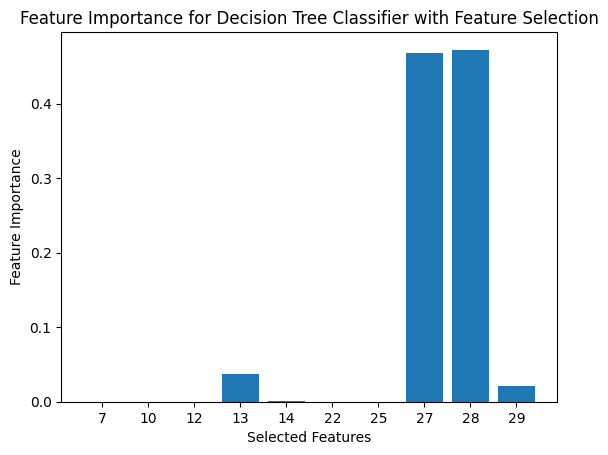

In [ ]:
feature_importance = model.feature_importances_
plt.bar(range(X_selected.shape[1]), feature_importance)
plt.xticks(range(X_selected.shape[1]), selector.get_support(indices=True))
plt.xlabel('Selected Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Decision Tree Classifier with Feature Selection')
plt.show()

Learning Curve

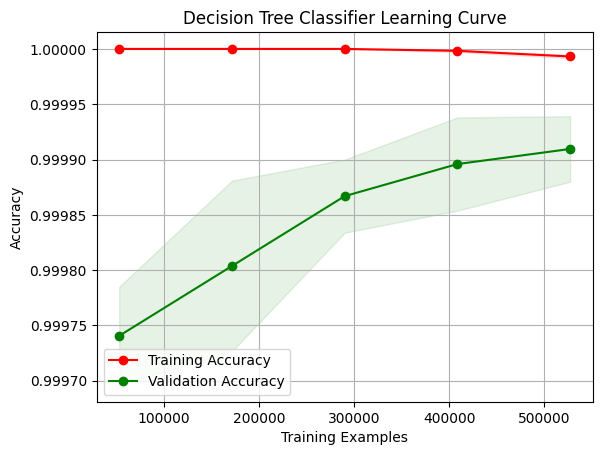

In [ ]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Decision Tree Classifier Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Validation Accuracy')
plt.legend(loc='best')
plt.show()

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Define and initialize the logistic regression model
model = LogisticRegression(multi_class='multinomial',solver = 'saga',max_iter=1000)

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

*Evaluation*

Accuracy, Precision, Recall, F1

In [ ]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

# Print the performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.8964185001672853
Precision: 0.9003072586387677
Recall: 0.8964185001672853
F1 score: 0.8969489072631033


Classification Report

In [ ]:
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     29455
           1       0.83      0.90      0.87     92753
           2       0.93      0.91      0.92    128860

    accuracy                           0.90    251068
   macro avg       0.91      0.88      0.89    251068
weighted avg       0.90      0.90      0.90    251068



Confusion Matrix

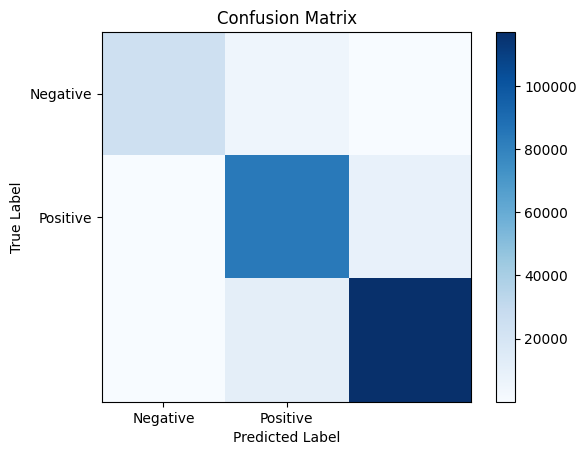

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.colorbar()

# Show the plot
plt.show()

ROC Curve

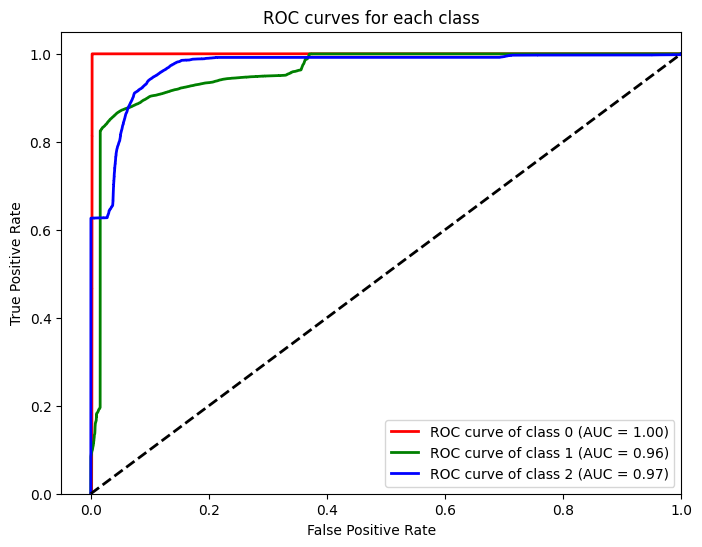

In [ ]:
# Get predicted probabilities for each class on the test set
y_pred_proba = model.predict_proba(X_test)

# Compute ROC curve and ROC AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(model.classes_.size):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
lw = 2
colors = ['red', 'green', 'blue']
for i, color in zip(range(model.classes_.size), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for each class')
plt.legend(loc="lower right")
plt.show()

Precision Recall Curve

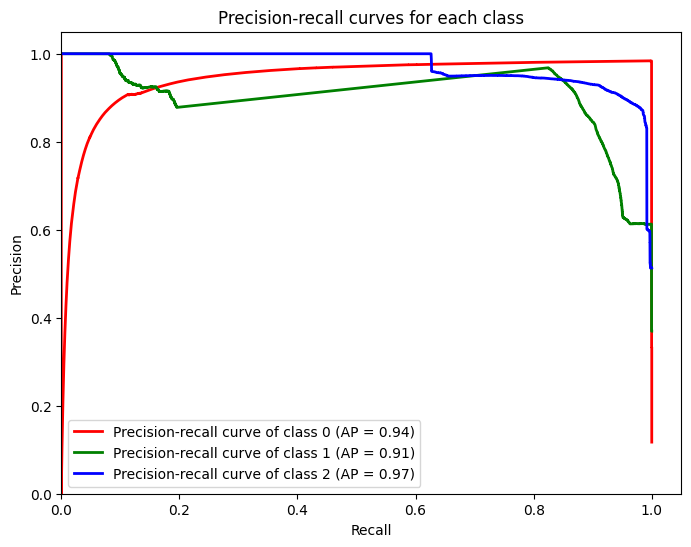

In [ ]:
# Compute precision-recall curve and average precision score for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(model.classes_.size):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    average_precision[i] = auc(recall[i], precision[i])

# Plot precision-recall curves for each class
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, color in zip(range(model.classes_.size), colors):
    plt.plot(recall[i], precision[i], color=color, lw=lw,
             label='Precision-recall curve of class {0} (AP = {1:0.2f})'
             ''.format(i, average_precision[i]))
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curves for each class')
plt.legend(loc="best")
plt.show()

Learning Curve

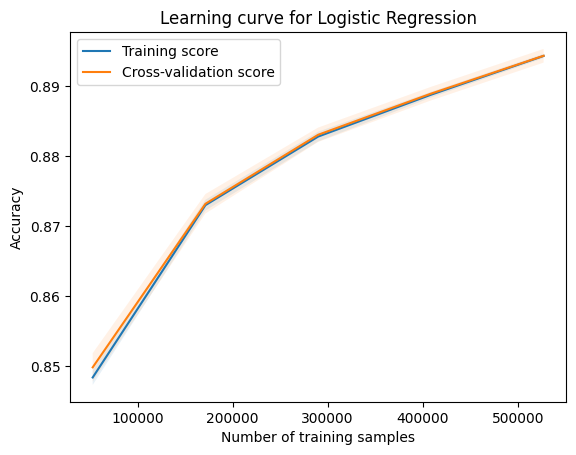

In [ ]:
# define the learning curve parameters
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=10, scoring='accuracy')

# calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

# plot the shaded area between the training and test scores
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, alpha=0.1)

# plot the legend and axis labels
plt.legend()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning curve for Logistic Regression')
plt.show()

**Naive Bayes**

Problem because of negative values


**LGBM**

In [ ]:
import lightgbm as lgb


# Define model parameters
params = {
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': 3,
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature='auto')

# Train model
model = lgb.train(params, train_data, num_boost_round=500)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.171983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 585823, number of used features: 10
[LightGBM] [Info] Start training from score -2.138056
[LightGBM] [Info] Start training from score -0.996411
[LightGBM] [Info] Start training from score -0.667646
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
# Convert predictions to class labels
y_pred_labels = [list(x).index(max(x)) for x in y_pred]

*Evaluation*

Accuracy, Precision, Recall, F1

In [ ]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels,average='weighted')
recall = recall_score(y_test, y_pred_labels,average='weighted')
f1 = f1_score(y_test, y_pred_labels,average='weighted')

# Print the performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.9999561871684165
Precision: 0.9999561870464325
Recall: 0.9999561871684165
F1 score: 0.9999561870889626


Classification Report

In [ ]:
print("Classification report:")
print(classification_report(y_test, y_pred_labels))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29455
           1       1.00      1.00      1.00     92753
           2       1.00      1.00      1.00    128860

    accuracy                           1.00    251068
   macro avg       1.00      1.00      1.00    251068
weighted avg       1.00      1.00      1.00    251068



ROC Curve

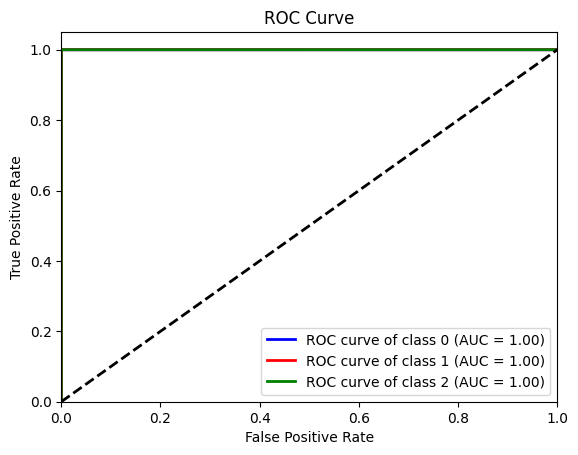

In [ ]:
# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Precision Recall Curve

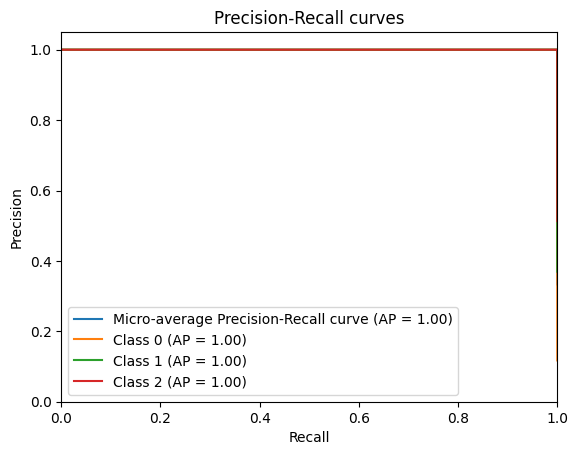

In [ ]:
n_classes = 3
# Get the probabilities for each class
y_prob = np.array([y_pred[:,i] for i in range(n_classes)]).T

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute the precision-recall curve for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob[:, i])

# Compute micro-average precision-recall curve
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_prob.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_prob, average="micro")

# Plot the precision-recall curves
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post', label='Micro-average Precision-Recall curve (AP = {0:0.2f})'.format(average_precision["micro"]))
for i in range(n_classes):
    plt.step(recall[i], precision[i], where='post', label='Class {0} (AP = {1:0.2f})'.format(i, average_precision[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.title('Precision-Recall curves')
plt.show()

Learning Curve

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 46865, number of used features: 10
[LightGBM] [Info] Start training from score -2.152023
[LightGBM] [Info] Start training from score -0.994255
[LightGBM] [Info] Start training from score -0.666014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will 

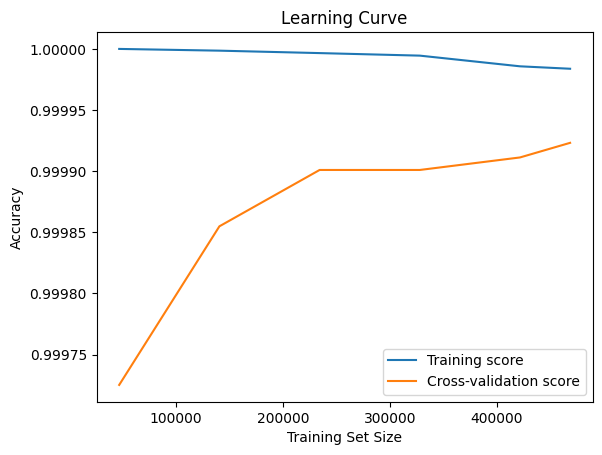

In [ ]:
from lightgbm import LGBMClassifier
# Create an instance of LGBMClassifier
lgbm = LGBMClassifier(**params)

# Get learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    lgbm, X_train, y_train, cv=5, scoring='accuracy', train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0])

# Plot learning curve
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

**NEURAL NETWORK**

In [ ]:
# Define number of classes and number of input features
from keras.models import Sequential
from keras.layers import Dense

num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

# Define model architecture
model = Sequential()
model.add(Dense(256, input_dim=num_features, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
from keras.optimizers import Adam
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model to training data
hist = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.3,verbose=1)

Epoch 1/10
12815/12815 [==============================] - 61s 5ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0030 - val_accuracy: 0.9997
Epoch 2/10
12815/12815 [==============================] - 70s 5ms/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0018 - val_accuracy: 0.9998
Epoch 3/10
12815/12815 [==============================] - 70s 5ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9996
Epoch 4/10
12815/12815 [==============================] - 60s 5ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0022 - val_accuracy: 0.9997
Epoch 5/10
12815/12815 [==============================] - 61s 5ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.0018 - val_accuracy: 0.9997
Epoch 6/10
12815/12815 [==============================] - 59s 5ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0016 - val_accuracy: 0.9998
Epoch 7/10
12815/12815 [==============================] - 69s 5ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0

*Evaluation*

Accuracy

In [ ]:
# Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0011561786523088813
Test accuracy: 0.9998366832733154


Accuracy vs Loss Graph

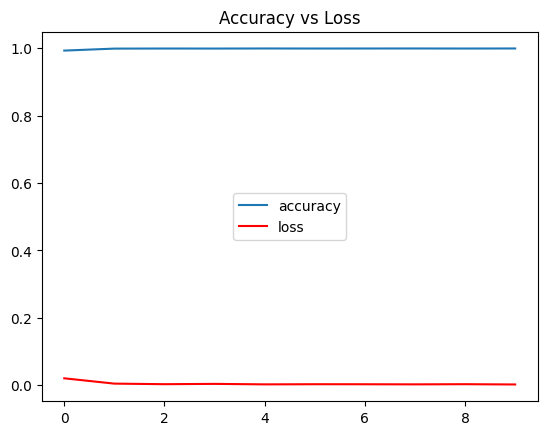

In [ ]:
# Plot the accuracy vs validation accuracy graph
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'], c="red")
plt.title('Accuracy vs Loss')
plt.legend(['accuracy', 'loss'], loc='center' )
plt.show()

Accuracy, Precision, Recall, F1

In [ ]:
# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')

# Print the performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

7846/7846 [==============================] - 17s 2ms/step
Accuracy: 0.9998366976277343
Precision: 0.999836781009143
Recall: 0.9998366976277343
F1 score: 0.9998367152912608


Classification Report

In [ ]:
print("Classification report:")
print(classification_report(y_test, y_pred_labels))

ROC Curve

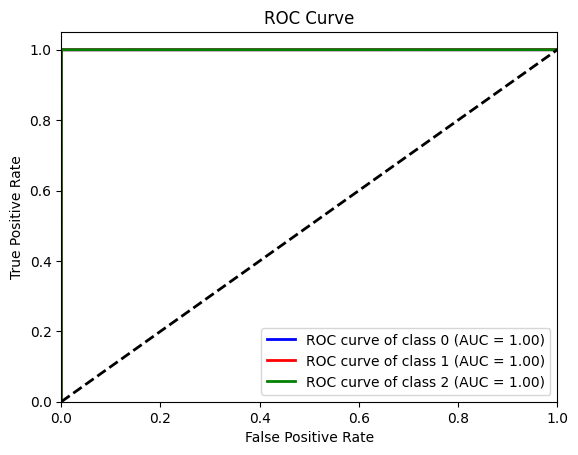

In [ ]:
# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Precision Recall Curve

In [ ]:
# Get the probabilities for each class
y_prob = np.array([y_pred[:,i] for i in range(n_classes)]).T

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute the precision-recall curve for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob[:, i])

# Compute micro-average precision-recall curve
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_prob.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_prob, average="micro")

# Plot the precision-recall curves
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post', label='Micro-average Precision-Recall curve (AP = {0:0.2f})'.format(average_precision["micro"]))
for i in range(n_classes):
    plt.step(recall[i], precision[i], where='post', label='Class {0} (AP = {1:0.2f})'.format(i, average_precision[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.title('Precision-Recall curves')
plt.show()